# Trabajo K-medias

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [14, 14]
np.random.seed(42)

In [2]:
import pandas as pd
import os
mainpath = "C:/Users/Camila Saenz/Downloads/TAREAS/Trabajo integrador final/"
filename = "covid utf.csv"
fullpath = os.path.join(mainpath, filename)

In [3]:
fullpath

'C:/Users/Camila Saenz/Downloads/TAREAS/Trabajo integrador final/covid utf.csv'

In [4]:
#Los input a utilizar son las variables independientes del dataset
variables = pd.read_csv(fullpath).drop(["Desembolso_mes", "Saldo Promedio", "Deuda Sistea", "Pasivo", "Venta Formal","Impactado", "Pasivo_desembolso","Turismo", "Deuda rezagada va", "Deuda rezagada vr", "pasivo rezagada va", "pasivo rezagada vr", "Pasivo_desembolso da", "Pasivo_desembolso dr"], axis=1)

In [5]:
variables.head()

,Sector,Dep,Saldo,Sector de Impacto,Venta
0,INDUSTRIA,Lima,56643.10092,3,108400.0
1,COMERCIO,Arequipa,190313.99460,4,105300.0
2,SERVICIO,Amazonas,547601.57360,1,86600.0
3,INDUSTRIA,Lima,283914.20840,3,103000.0
4,COMERCIO,Cusco,142296.43840,4,172920.0


In [6]:
datos_numericos = variables.select_dtypes([int, float])
datos_categoricos = variables.select_dtypes([object, "category"])

In [7]:
import warnings
warnings.filterwarnings("ignore")
for col in datos_numericos.columns:
    datos_numericos[col].fillna(datos_numericos[col].mean(), inplace=True)

Un aspecto importante a tener en cuenta cuando usamos Kmedias es que las distancias dependen de las escalas de las variables. Por lo tanto, es conveniente normalizar datos antes de continuar

In [8]:
from sklearn.preprocessing import MinMaxScaler

datos_numericos_normalizado = MinMaxScaler().fit_transform(datos_numericos)
datos_numericos_normalizado = pd.DataFrame(datos_numericos_normalizado,
                                               columns=datos_numericos.columns) 
datos_numericos_normalizado.head()

,Saldo,Sector de Impacto,Venta
0,0.011770,0.666667,0.066571
1,0.039600,1.000000,0.064629
2,0.113987,0.000000,0.052918
3,0.059088,0.666667,0.063189
4,0.029603,1.000000,0.106976


In [9]:
datos_categoricos_codificados = pd.get_dummies(datos_categoricos, drop_first=True)

In [10]:
variable_procesada = pd.concat([datos_numericos_normalizado, datos_categoricos_codificados], axis=1)

In [11]:
variable_procesada.shape

(1998, 29)

In [12]:
variable_procesada.head()

,Saldo,Sector de Impacto,Venta,Sector_INDUSTRIA,Sector_SERVICIO,Dep_Apurímac,Dep_Arequipa,Dep_Ayacucho,Dep_Cajamarca,Dep_Callao,...,Dep_Madre de Dios,Dep_Moquegua,Dep_Pasco,Dep_Piura,Dep_Puno,Dep_San Martín,Dep_Tacna,Dep_Tumbes,Dep_Ucayali,Dep_Áncash
0,0.011770,0.666667,0.066571,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.039600,1.000000,0.064629,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.113987,0.000000,0.052918,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.059088,0.666667,0.063189,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.029603,1.000000,0.106976,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# K medias

In [13]:
from sklearn.cluster import KMeans

In [14]:
estimador_kmedias = KMeans(random_state=42, n_clusters=8)

estimador_kmedias.fit(variable_procesada)

KMeans(random_state=42)

Dado que es aprendizaje no supervisado, nos interesan las clases (los clusters) de los datos de entrenamiento.

In [15]:
clusters = estimador_kmedias.labels_
clusters

array([3, 7, 1, ..., 0, 0, 7])

No obstante, como cualquier estimador, podemos usarlo para asignar clusters a nuevos elementos

In [16]:
estimador_kmedias.predict(variable_procesada)

array([3, 7, 1, ..., 0, 0, 7])

In [17]:
Target=pd.DataFrame(data=estimador_kmedias.predict(variable_procesada), columns = ['Cluster'])
Target.head()

,Cluster
0,3
1,7
2,1
3,3
4,2


In [18]:
final=pd.concat([variable_procesada, Target], axis=1)
final

,Saldo,Sector de Impacto,Venta,Sector_INDUSTRIA,Sector_SERVICIO,Dep_Apurímac,Dep_Arequipa,Dep_Ayacucho,Dep_Cajamarca,Dep_Callao,...,Dep_Moquegua,Dep_Pasco,Dep_Piura,Dep_Puno,Dep_San Martín,Dep_Tacna,Dep_Tumbes,Dep_Ucayali,Dep_Áncash,Cluster
0,0.011770,0.666667,0.066571,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0.039600,1.000000,0.064629,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0.113987,0.000000,0.052918,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.059088,0.666667,0.063189,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0.029603,1.000000,0.106976,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0.000878,1.000000,0.017472,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1994,0.019683,1.000000,0.018788,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1995,0.155622,0.666667,0.111977,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0.003741,0.666667,0.042209,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


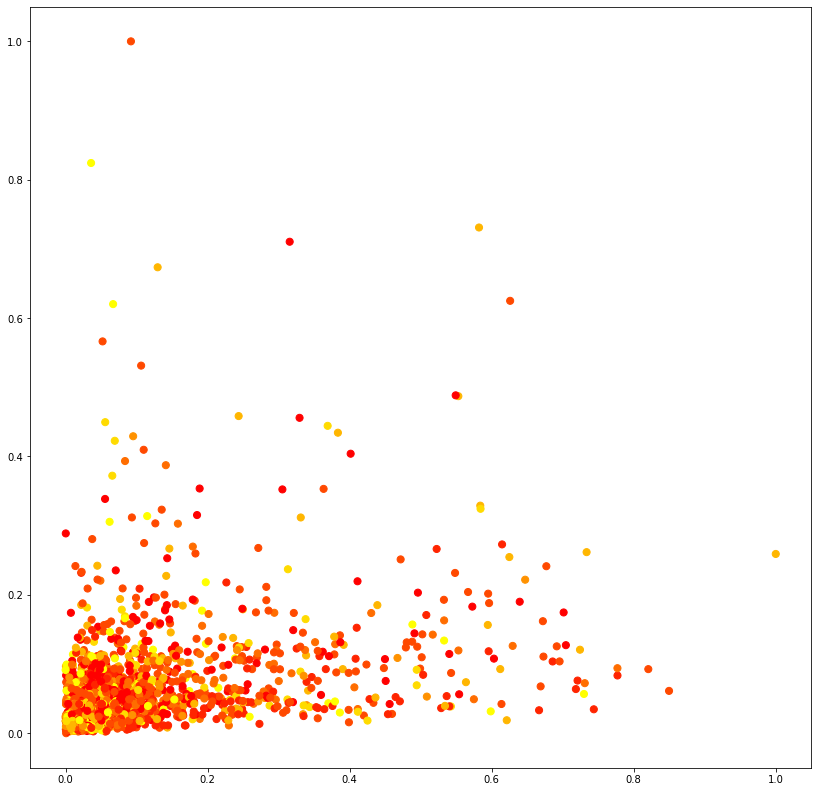

In [19]:
plt.scatter(final["Saldo"], final["Venta"], c = final["Cluster"], s = 50, cmap="autumn")

In [20]:
centroides = estimador_kmedias.cluster_centers_
centroides

array([[ 8.76119759e-02,  6.67579909e-01,  6.74893441e-02,
         1.38777878e-16,  3.33066907e-16,  1.73472348e-18,
        -6.93889390e-17,  1.73472348e-17,  6.93889390e-18,
         3.46944695e-18,  6.93889390e-18,  1.08420217e-18,
         1.38777878e-17, -1.04083409e-17,  7.63278329e-17,
        -2.08166817e-17,  5.55111512e-17,  1.00000000e+00,
         1.04083409e-17, -3.46944695e-18, -6.93889390e-18,
        -6.93889390e-18, -3.46944695e-17, -5.20417043e-18,
         4.16333634e-17, -1.38777878e-17,  1.73472348e-17,
         1.73472348e-17,  2.08166817e-17],
       [ 1.21719895e-01,  7.63358779e-01,  4.41560962e-02,
         1.38777878e-16,  1.00000000e+00,  1.14503817e-02,
        -1.38777878e-17,  3.05343511e-02,  8.77862595e-02,
         4.96183206e-02,  6.87022901e-02,  3.81679389e-03,
         5.72519084e-02,  8.01526718e-02,  6.24500451e-17,
         1.03053435e-01,  4.16333634e-17, -1.66533454e-16,
         2.29007634e-02,  1.14503817e-02,  3.05343511e-02,
         2.29

In [21]:
centroides.shape

(8, 29)

In [22]:
estimador_kmedias.inertia_

1197.0182007945743

In [23]:
print(KMeans.__doc__)

K-Means clustering.

    Read more in the :ref:`User Guide <k_means>`.

    Parameters
    ----------

    n_clusters : int, default=8
        The number of clusters to form as well as the number of
        centroids to generate.

    init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
        Method for initialization:

        'k-means++' : selects initial cluster centers for k-mean
        clustering in a smart way to speed up convergence. See section
        Notes in k_init for more details.

        'random': choose `n_clusters` observations (rows) at random from data
        for the initial centroids.

        If an array is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centers.

        If a callable is passed, it should take arguments X, n_clusters and a
        random state and return an initialization.

    n_init : int, default=10
        Number of time the k-means al

In [24]:
from sklearn.metrics import euclidean_distances

In [25]:
distancias_centroides = euclidean_distances(centroides)
distancias_centroides

array([[0.        , 1.44180844, 1.03305645, 1.03522762, 1.44019932,
        1.00153119, 1.44596488, 1.479201  ],
       [1.44180844, 0.        , 1.00964713, 1.61515738, 1.28064555,
        1.03482248, 1.26307086, 1.20830902],
       [1.03305645, 1.00964713, 0.        , 1.26338352, 1.06878377,
        1.43917536, 1.07577855, 1.12099474],
       [1.03522762, 1.61515738, 1.26338352, 0.        , 1.56689139,
        1.44040095, 1.57255138, 1.56162916],
       [1.44019932, 1.28064555, 1.06878377, 1.56689139, 0.        ,
        1.60219684, 1.41520911, 1.42353178],
       [1.00153119, 1.03482248, 1.43917536, 1.44040095, 1.60219684,
        0.        , 1.58766865, 1.54471326],
       [1.44596488, 1.26307086, 1.07577855, 1.57255138, 1.41520911,
        1.58766865, 0.        , 1.42163154],
       [1.479201  , 1.20830902, 1.12099474, 1.56162916, 1.42353178,
        1.54471326, 1.42163154, 0.        ]])

In [26]:
list(zip(np.argmax(distancias_centroides, axis=1), np.max(distancias_centroides, axis=1)))

[(7, 1.479200998485295),
 (3, 1.615157382622767),
 (5, 1.4391753581450943),
 (1, 1.615157382622767),
 (5, 1.6021968387272267),
 (4, 1.6021968387272267),
 (5, 1.5876686485200846),
 (3, 1.5616291635467379)]

In [27]:
def resumen_cluster(cluster_id):
    cluster = variables[clusters==cluster_id]
    resumen_cluster = cluster[datos_categoricos.columns].mode().to_dict(orient="records")[0]
    resumen_cluster.update(cluster.mean().to_dict())
    resumen_cluster["cluster_id"] = cluster_id
    return resumen_cluster

def comparar_clusters(*cluster_ids):
    resumenes = []
    for cluster_id in cluster_ids:
        resumenes.append(resumen_cluster(cluster_id))
    return pd.DataFrame(resumenes).set_index("cluster_id").T

In [28]:
resumen_cluster(7)

{'Sector': 'COMERCIO',
 'Dep': 'Arequipa',
 'Saldo': 305630.86957820115,
 'Sector de Impacto': 3.058201058201058,
 'Venta': 85924.98746031747,
 'cluster_id': 7}

In [29]:
comparar_clusters(0,7)

cluster_id,0,7
Sector,COMERCIO,COMERCIO
Dep,Lima,Arequipa
Saldo,420919.688485,305630.869578
Sector de Impacto,3.00274,3.058201
Venta,109866.984603,85924.98746


In [30]:
comparar_clusters(*np.unique(clusters))

cluster_id,0,1,2,3,4,5,6,7
Sector,COMERCIO,SERVICIO,COMERCIO,INDUSTRIA,COMERCIO,SERVICIO,COMERCIO,COMERCIO
Dep,Lima,San Martín,Piura,Lima,Junín,Lima,Lambayeque,Arequipa
Saldo,420919.688485,584743.390605,504193.362457,528216.955833,383785.517801,524024.817597,548807.549514,305630.869578
Sector de Impacto,3.00274,3.290076,2.953069,2.975728,3.067797,3.15534,3.020408,3.058201
Venta,109866.984603,72608.454389,106857.93574,102582.21534,81418.473729,116352.189126,113119.969388,85924.98746


In [31]:
def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

def resumen_grafico_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

In [34]:
cluster_results = kmeans_cluster(variable_procesada, 8)
cluster_summary = resumen_grafico_clustering(cluster_results)

In [35]:
cluster_summary

,Dep_Apurímac,Dep_Arequipa,Dep_Ayacucho,Dep_Cajamarca,Dep_Callao,Dep_Cusco,Dep_Huancavelica,Dep_Huánuco,Dep_Ica,Dep_Junín,...,Dep_San Martín,Dep_Tacna,Dep_Tumbes,Dep_Ucayali,Dep_Áncash,Saldo,Sector de Impacto,Sector_INDUSTRIA,Sector_SERVICIO,Venta
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.087612,0.667580,0.000000,0.000000,0.067489
1,0.011450,0.0,0.030534,0.087786,0.049618,0.068702,0.003817,0.057252,0.080153,0.0,...,0.106870,0.026718,0.026718,0.045802,0.091603,0.121720,0.763359,0.000000,1.000000,0.044156
2,0.019856,0.0,0.034296,0.052347,0.036101,0.050542,0.001805,0.059567,0.048736,0.0,...,0.099278,0.048736,0.036101,0.034296,0.086643,0.104949,0.651023,0.000000,0.000000,0.065605
3,0.004854,0.0,0.000000,0.014563,0.009709,0.009709,0.000000,0.024272,0.019417,0.0,...,0.024272,0.009709,0.000000,0.014563,0.009709,0.109951,0.658576,1.000000,0.000000,0.062927
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.079881,0.689266,0.093220,0.254237,0.049673
5,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.109078,0.718447,0.000000,1.000000,0.071551
6,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.114238,0.673469,0.091837,0.285714,0.069527
7,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.063609,0.686067,0.158730,0.402116,0.052496


In [36]:
matplotlib.rcParams['figure.figsize'] = [14, 14]

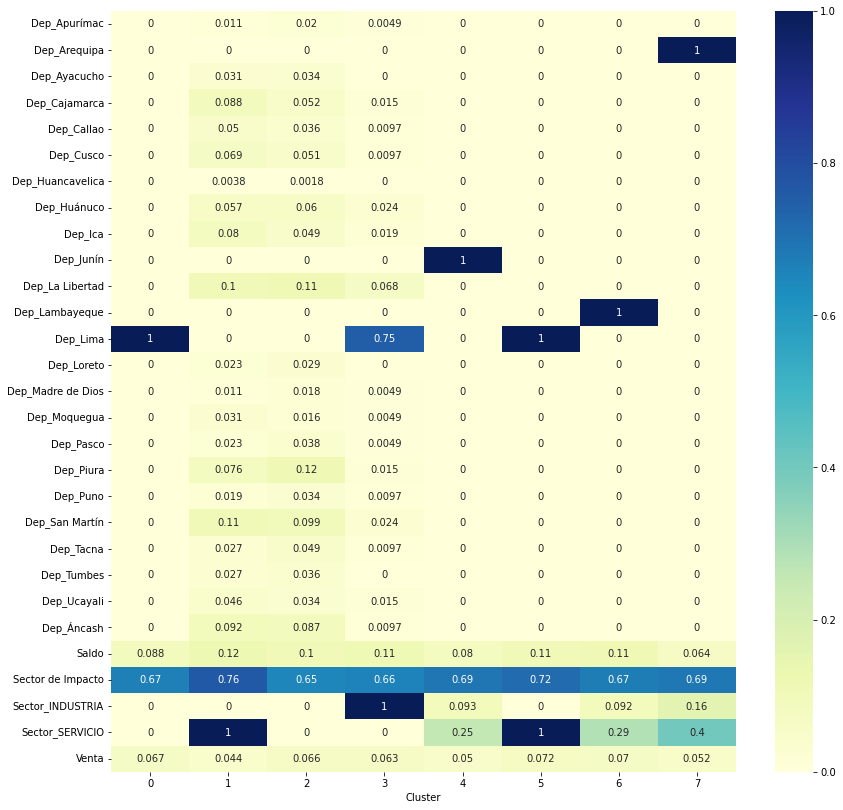

In [37]:
import seaborn as sns
sns.heatmap(cluster_summary.transpose(), annot=True,cmap="YlGnBu");